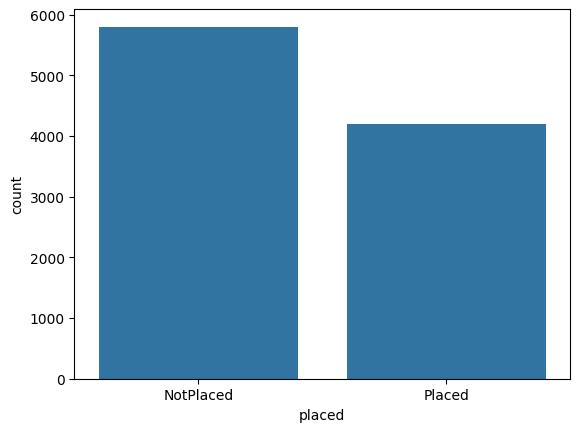

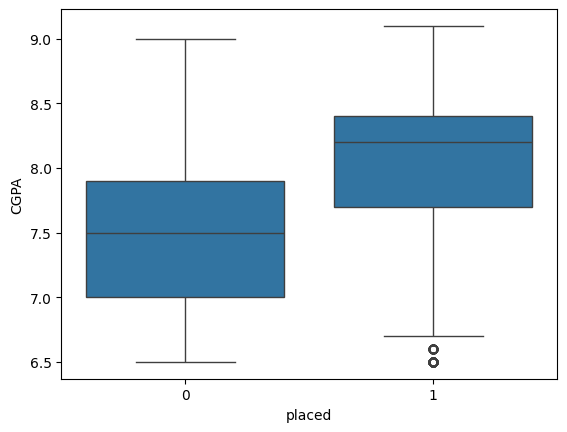

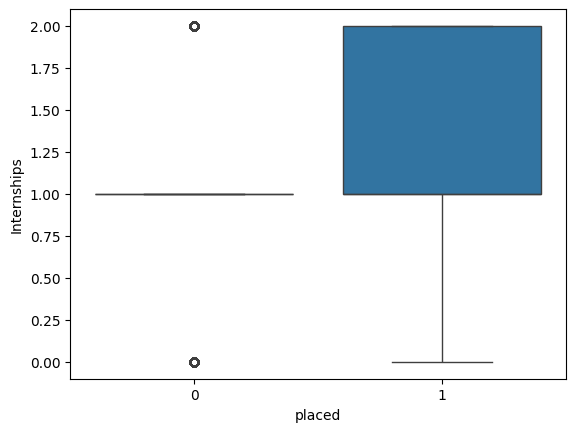

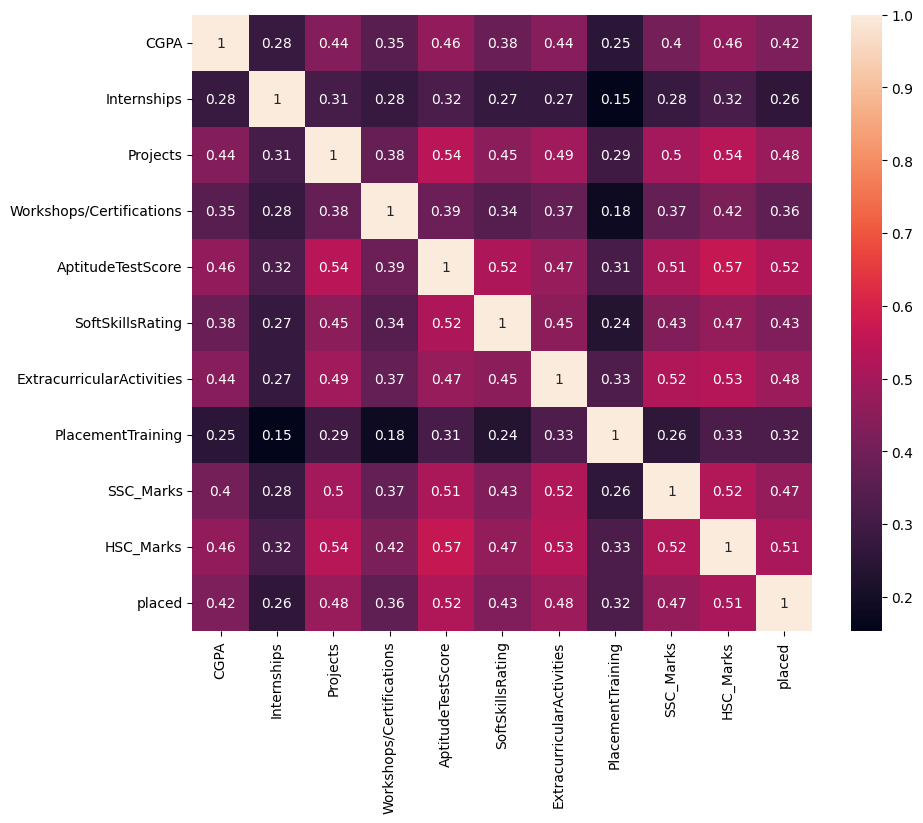

Accuracy: 0.7945
[[954 218]
 [193 635]]


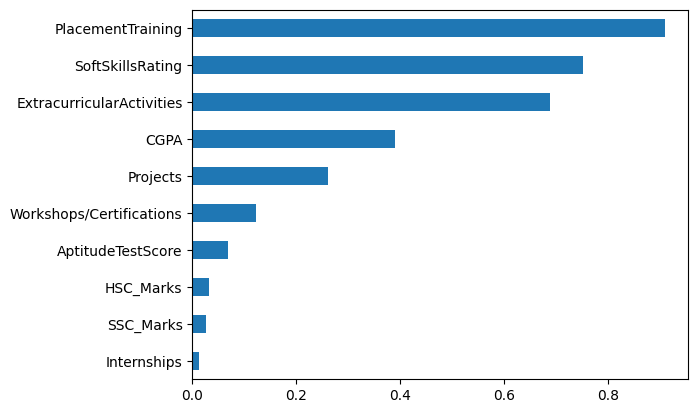

In [1]:
import pandas as pd

df = pd.read_csv("Placement_BeginnerTask01.csv")
df.head()
df['placed'] = df['PlacementStatus'].map({
    'Placed': 1,
    'NotPlaced': 0
})
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map({'Yes': 1, 'No': 0})
df['PlacementTraining'] = df['PlacementTraining'].map({'Yes': 1, 'No': 0})
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='placed', data=df)
plt.xticks([0,1], ['NotPlaced', 'Placed'])
plt.show()
sns.boxplot(x='placed', y='CGPA', data=df)
plt.show()
sns.boxplot(x='placed', y='Internships', data=df)
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(['StudentID','PlacementStatus'], axis=1).corr(), annot=True)
plt.show()
from sklearn.model_selection import train_test_split

X = df.drop(['StudentID', 'PlacementStatus', 'placed'], axis=1)
y = df['placed']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh')
plt.show()
